In [1]:
import glob
from matplotlib.animation import FuncAnimation, PillowWriter, FFMpegWriter
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = "10"
import numpy as np
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import DBSCAN

# Vicsek_bands

### Start and End

In [5]:
# path to relevant files
bands_paths = glob.glob("../plotting_data/bands/pos_ang2_*.npz")
bands_paths.sort()

# loading positions and angles
bands_start = np.load(bands_paths[1]) # first frame
bands_start_pos = bands_start["positions"]
bands_start_ang = bands_start["angles"]

bands_end = np.load(bands_paths[-1]) # last frame
bands_end_pos = bands_end["positions"]
bands_end_ang = bands_end["angles"]
    
# check size of arrays
print(f"start positions length: {len(bands_start_pos)}")
print(f"start angles length: {len(bands_start_ang)}")
print(f"end positions length: {len(bands_end_pos)}")
print(f"end angles length: {len(bands_end_ang)}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000


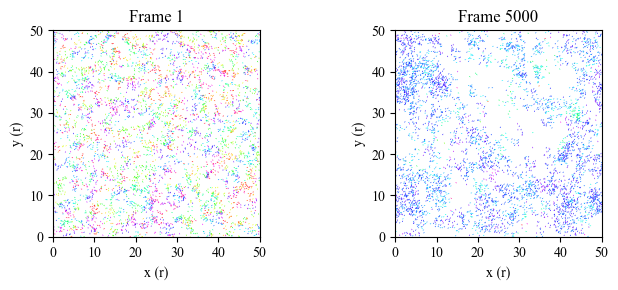

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

# first frame plot
ax1.set_aspect("equal")
qv1 = ax1.quiver(bands_start_pos[:,0], bands_start_pos[:,1], np.cos(bands_start_ang), np.sin(bands_start_ang), bands_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv1.set_offsets(bands_start_pos)
qv1.set_UVC(np.cos(bands_start_ang), np.sin(bands_start_ang), bands_start_ang)
ax1.set_title("Frame 1")
ax1.set_xlabel("x (r)")
ax1.set_ylabel("y (r)")
ax1.set_xticks(range(0, 51, 10))
ax1.set_yticks(range(0, 51, 10))
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 50)

# last frame plot
ax2.set_aspect("equal")
qv2 = ax2.quiver(bands_end_pos[:,0], bands_end_pos[:,1], np.cos(bands_end_ang), np.sin(bands_end_ang), bands_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(bands_end_pos)
qv2.set_UVC(np.cos(bands_end_ang), np.sin(bands_end_ang), bands_end_ang)
ax2.set_title("Frame 5000")
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
# plt.savefig("../report_figs/bands_frames.png", dpi = 300)
plt.show()

### Order Parameter

In [439]:
bands_order_param = {}
bands_steady_reached = {}
bands_steady_time = {}

# loading relevant files and data for each eta
for eta in range(1, 6):
    bands_order = np.load(f"../plotting_data/bands/order{eta}.npz")
    bands_order_param[eta] = bands_order["order"]
    bands_steady_reached[eta] = bands_order["steady_reached"]
    bands_steady_time[eta] = bands_order["steady_time"]
    
    # for eta = 0.2
    if eta ==2:
        bands_order_param2 = bands_order_param[eta]
        bands_steady_reached2 = bands_steady_reached[eta]
        bands_steady_time2 = bands_steady_time[eta]
    
    # checking size of arrays   
    print(f"eta: 0.{eta}")
    print(f"order parameter length: {len(bands_order_param[eta])}")
    print(f"steady time: {bands_steady_time[eta] * 10}")

# for eta = 0.2
print(f"order parameter 2 length: {len(bands_order_param2)}")
print(f"steady time: {bands_steady_time2 * 10}")
    
time_step = 10

eta: 0.1
order parameter length: 500
steady time: 39.0
eta: 0.2
order parameter length: 500
steady time: 45.0
eta: 0.3
order parameter length: 500
steady time: 35.0
eta: 0.4
order parameter length: 500
steady time: 68.0
eta: 0.5
order parameter length: 500
steady time: 25.0
order parameter 2 length: 500
steady time: 45.0


<>:12: SyntaxWarning: invalid escape sequence '\p'
<>:12: SyntaxWarning: invalid escape sequence '\p'
/var/folders/sy/dfcv0pl97t54wq4tf148fgm40000gn/T/ipykernel_17615/4257310935.py:12: SyntaxWarning: invalid escape sequence '\p'
  ax.set_ylabel("$\phi$(t)")


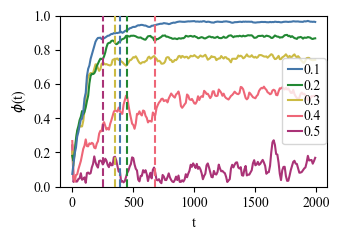

In [440]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

colors = {1: "#4477AA", 2: "#228833", 3: "#CCBB44", 4: "#EE6677", 5: "#AA3377"} # colour blind friendly colours

# plotting order parameter for each eta
for eta in range(1, 6):
    times = np.arange(0, 2000, 10)
    order, = ax.plot(times, bands_order_param[eta][:200], label = f"0.{eta}", color = colors[eta], zorder = (6 - eta))
    order_colour = order.get_color() # match order parameter and steady state line colours
    # plot steady state line
    if bands_steady_reached[eta] == True:
        ax.axvline(x = bands_steady_time[eta] * time_step, color = order_colour, linestyle = "--", zorder = (6 - eta + 5))
ax.set_xlabel("t")
ax.set_ylabel("$\phi$(t)")
ax.set_xticks(np.arange(0, 2001, 500))
ax.set_ylim(0, 1.0)
ax.legend(loc = "center right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
plt.tight_layout()
# plt.savefig("../report_figs/bands_order.png", dpi = 300)
plt.show()

### Clustering

In [441]:
bands_num_clust = {}
bands_particle_clust = {}

# loading relevant files and data for each eta
for eta in range(1, 6):
    bands_clusters = np.load(f"../plotting_data/bands/clusters{eta}.npz")
    bands_num_clust[eta] = bands_clusters["num_clust"]
    bands_particle_clust[eta] = bands_clusters["particle_clust"]
    
    # for eta = 0.2
    if eta == 2:
        bands_num_clust2 = bands_num_clust[eta]
        bands_particle_clust2 = bands_particle_clust[eta]
    
    # checking size of arrays
    print(f"eta: 0.{eta}")
    print(f"num clusters length: {len(bands_num_clust[eta])}")
    print(f"particles/cluster length: {len(bands_particle_clust[eta])}")
    print(f"max particles/cluster: {max(bands_particle_clust[eta])}")

# for eta = 0.2    
print(f"num clusters 2 length: {len(bands_num_clust2)}")
print(f"particles/cluster 2 length: {len(bands_particle_clust2)}")
print(f"max particles/cluster: {max(bands_particle_clust2)}")

eta: 0.1
num clusters length: 501
particles/cluster length: 501
max particles/cluster: 454.5
eta: 0.2
num clusters length: 501
particles/cluster length: 501
max particles/cluster: 277.75
eta: 0.3
num clusters length: 501
particles/cluster length: 501
max particles/cluster: 294.0
eta: 0.4
num clusters length: 501
particles/cluster length: 501
max particles/cluster: 357.25
eta: 0.5
num clusters length: 501
particles/cluster length: 501
max particles/cluster: 357.25
num clusters 2 length: 501
particles/cluster 2 length: 501
max particles/cluster: 277.75


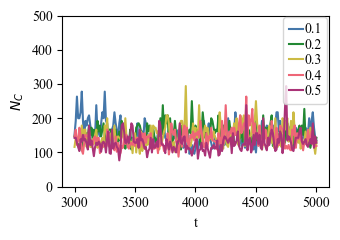

In [442]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

colors = {1: "#4477AA", 2: "#228833", 3: "#CCBB44", 4: "#EE6677", 5: "#AA3377"} # colour blind friendly colours

# plotting cluster size for each eta
for eta in range(1, 6):
    time_scale = np.arange(3000, 5001, 10)
    ax.plot(time_scale, bands_particle_clust[eta][300:], label = f"0.{eta}", color = colors[eta])
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
ax.set_ylim(0, 500)
ax.legend(loc = "upper right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
plt.tight_layout()
# plt.savefig("../report_figs/bands_clusters.png", dpi = 300)
plt.show()

### Average Angles

In [443]:
bands_avg_ang = {}

# loading relevant files and data for each eta
for eta in range(1, 6):
    bands_avg_angs = np.load(f"../plotting_data/bands/avg_ang{eta}.npz")
    bands_avg_ang[eta] = bands_avg_angs["angles"]
    
    # checking array size
    print(f"eta: 0.{eta}")
    print(f"average angles length: {len(bands_avg_ang[eta])}")

time_step = 10


eta: 0.1
average angles length: 500
eta: 0.2
average angles length: 500
eta: 0.3
average angles length: 500
eta: 0.4
average angles length: 500
eta: 0.5
average angles length: 500


<>:4: SyntaxWarning: invalid escape sequence '\e'
<>:4: SyntaxWarning: invalid escape sequence '\e'
/var/folders/sy/dfcv0pl97t54wq4tf148fgm40000gn/T/ipykernel_17615/4100435812.py:4: SyntaxWarning: invalid escape sequence '\e'
  ax.plot(times, bands_avg_ang[eta], label = f"$\eta$=0.{eta}")


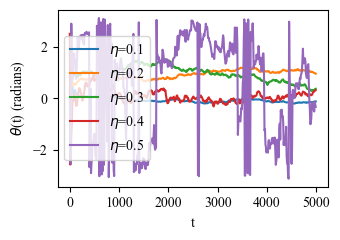

In [444]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting average angles for each eta
for eta in range(1, 6):
    times = np.arange(0, 5000, 10)
    ax.plot(times, bands_avg_ang[eta], label = f"$\eta$=0.{eta}")
ax.set_xlabel("t")
ax.set_ylabel(r"$\theta$(t) (radians)")
ax.set_xticks(range(0, 5001, 1000))
ax.legend()
plt.tight_layout()
# plt.savefig("bands_alignment.png", dpi = 300)
plt.show()

### Histogram

In [445]:
bands_hist = {}
hist_normalised = {}

# loading relevant files and data for each eta
for eta in range(1, 6):
    bands_hists = np.load(f"../plotting_data/bands/hist{eta}.npz")
    bands_hist[eta] = bands_hists["hist"]
    hist_normalised[eta] = bands_hist[eta].T / sum(bands_hist[eta])
    
    # checking array size
    print(f"eta: 0.{eta}")
    print(f"hist length: {len(bands_hist[eta])}")

L = 50

eta: 0.1
hist length: 50
eta: 0.2
hist length: 50
eta: 0.3
hist length: 50
eta: 0.4
hist length: 50
eta: 0.5
hist length: 50


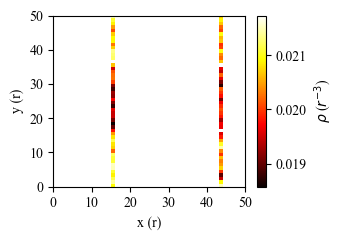

In [446]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting density map for eta = 0.2
cax = ax.imshow(hist_normalised[2], extent = [0, L, 0, L], origin = "lower", cmap = "hot", aspect = "auto")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
fig.colorbar(cax, ax = ax, label = r"$\rho$ ($r^{-3}$)")
plt.tight_layout()
# plt.savefig("bands_density.png", dpi = 300)
plt.show()

# Vicsek_bands_city

### Start and End

In [447]:
# path to relevant files
city_paths = glob.glob("../plotting_data/bands_city/pos_ang*.npz")
city_paths.sort()

# loading positions and angles data
city_start = np.load(city_paths[1]) # first frame
city_start_pos = city_start["positions"]
city_start_ang = city_start["angles"]

city_end = np.load(city_paths[-1]) # last frame
city_end_pos = city_end["positions"]
city_end_ang = city_end["angles"]

# loading barrier coordinates 
city_barriers = np.load("../plotting_data/bands_city/barriers.npy")
boundary = 1
  
# checking array sizes  
print(f"start positions length: {len(city_start_pos)}")
print(f"start angles length: {len(city_start_ang)}")
print(f"end positions length: {len(city_end_pos)}")
print(f"end angles length: {len(city_end_ang)}")
print(f"barriers:\n{city_barriers}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000
barriers:
[[29 37 32 42]
 [17 32  9 19]
 [15 21 35 41]
 [ 6 12 20 25]
 [39 44 12 25]]


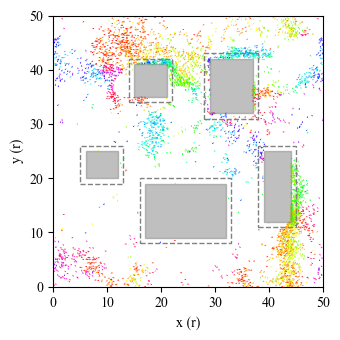

In [448]:
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

# ax1.set_aspect("equal")
# qv1 = ax1.quiver(city_start_pos[:,0], city_start_pos[:,1], np.cos(city_start_ang), np.sin(city_start_ang), city_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
# qv1.set_offsets(city_start_pos)
# qv1.set_UVC(np.cos(city_start_ang), np.sin(city_start_ang), city_start_ang)
# for barrier_x_start, barrier_x_end, barrier_y_start, barrier_y_end in city_barriers:
#     ax1.add_patch(plt.Rectangle((barrier_x_start, barrier_y_start), barrier_x_end - barrier_x_start, barrier_y_end - barrier_y_start, color = "grey", alpha = 0.5))
#     ax1.add_patch(plt.Rectangle((barrier_x_start - boundary, barrier_y_start - boundary), (barrier_x_end + boundary) - (barrier_x_start - boundary), (barrier_y_end + boundary) - (barrier_y_start - boundary), edgecolor = "grey", fill = False))
# ax1.set_title("Frame 3")
# ax1.set_xlabel("x (r)")
# ax1.set_ylabel("y (r)")
# ax1.set_xticks(range(0, 51, 10))
# ax1.set_yticks(range(0, 51, 10))
# ax1.set_xlim(0, 50)
# ax1.set_ylim(0, 50)

# ax2.set_aspect("equal")

# plotting last frame
fig, ax2 = plt.subplots(figsize = (3.5, 3.5))
qv2 = ax2.quiver(city_end_pos[:,0], city_end_pos[:,1], np.cos(city_end_ang), np.sin(city_end_ang), city_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(city_end_pos)
qv2.set_UVC(np.cos(city_end_ang), np.sin(city_end_ang), city_end_ang)
for cbarrier_x_start, cbarrier_x_end, cbarrier_y_start, cbarrier_y_end in city_barriers:
    ax2.add_patch(plt.Rectangle((cbarrier_x_start, cbarrier_y_start), cbarrier_x_end - cbarrier_x_start, cbarrier_y_end - cbarrier_y_start, color = "grey", alpha = 0.5))
    ax2.add_patch(plt.Rectangle((cbarrier_x_start - boundary, cbarrier_y_start - boundary), (cbarrier_x_end + boundary) - (cbarrier_x_start - boundary), (cbarrier_y_end + boundary) - (cbarrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
# plt.savefig("../report_figs/city_frames.png", dpi = 300)
plt.show()

### Order Parameter

In [449]:
# loading relevant files and data
city_order = np.load("../plotting_data/bands_city/order.npz")
city_order_param = city_order["order"]
city_steady_reached = city_order["steady_reached"]
city_steady_time = city_order["steady_time"]

time_step = 10

# checking array size 
print(f"order parameter length: {len(city_order_param)}")
print(f"steady time: {city_steady_time * 10}")

order parameter length: 500
steady time: 2750.0


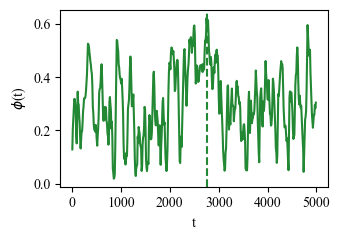

In [450]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting order parameter
times = np.arange(0, 5000, 10)
order, = ax.plot(times, city_order_param, color = "#228833")
order_colour = order.get_color()
# plotting steady state time
if city_steady_reached == True:
    ax.axvline(x = city_steady_time * time_step, color = order_colour, linestyle = "--")
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("city_order.png", dpi = 300)
plt.show()

### Clustering

In [451]:
# loading relevant files and data
city_clusters = np.load("../plotting_data/bands_city/clusters.npz")
city_num_clust = city_clusters["num_clust"]
city_particle_clust = city_clusters["particle_clust"]
 
# checking array sizes   
print(f"num clusters length: {len(city_num_clust)}")
print(f"particles/cluster length: {len(city_particle_clust)}")
print(f"max particles/cluster: {max(city_particle_clust)}")

num clusters length: 501
particles/cluster length: 501
max particles/cluster: 1667.0


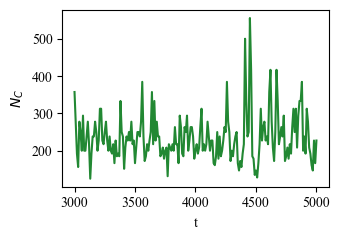

In [452]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting cluster size
time_scale = np.arange(3000, 5001, 10)
ax.plot(time_scale, city_particle_clust[300:], color = "#228833")
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
plt.tight_layout()
# plt.savefig("city_clusters.png", dpi = 300)
plt.show()

### Flux and Stream

In [453]:
# loading relevant files and data
city_flow = np.load("../plotting_data/bands_city/flow.npz")
city_vx = city_flow["vx"]
city_vy = city_flow["vy"]
city_counts = city_flow["counts"]
city_vxedges = city_flow["vxedges"]
city_vyedges = city_flow["vyedges"]

# loading barrier coordinates
city_barriers = np.load("../plotting_data/bands_city/barriers.npy")
boundary = 1
 
# checking array sizes   
print(f"vx length: {len(city_vx)}")
print(f"vy length: {len(city_vy)}")
print(f"counts length: {len(city_counts)}")
print(f"vxedges length: {len(city_vxedges)}")
print(f"vyedges length: {len(city_vyedges)}")
print(f"barriers length: {len(city_barriers)}")

vx length: 50
vy length: 50
counts length: 50
vxedges length: 51
vyedges length: 51
barriers length: 5


In [454]:
# average velocity flux calculations
c_avg_vx = np.zeros_like(city_vx) # empty array for average x velocity flux
c_avg_vy = np.zeros_like(city_vy)
c_avg_vx[city_counts > 0] = city_vx[city_counts > 0] / city_counts[city_counts > 0] # calculate average velocity flux
c_avg_vy[city_counts > 0] = city_vy[city_counts > 0] / city_counts[city_counts > 0] # where there are particles (counts > 0)

# create meshgrid for plotting
c_X, c_Y = np.meshgrid(city_vxedges[:-1], city_vyedges[:-1])

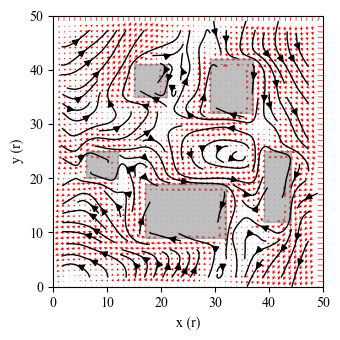

In [455]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))

# plotting velocity flux
# quiver plot
ax.quiver(c_X, c_Y, c_avg_vx.T, c_avg_vy.T, scale = 20, headwidth = 5, color = "red")
# only plot stream lines within box - not in and out of box edges (periodic boundary conditions)
edge_mask = np.ones_like(c_avg_vx, dtype = bool)
edge_mask[1:-1, 1:-1] = False
c_avg_vx_stream = np.where(edge_mask, np.nan, c_avg_vx)
c_avg_vy_stream = np.where(edge_mask, np.nan, c_avg_vy)
# stream plot
ax.streamplot(c_X, c_Y, c_avg_vx_stream.T, c_avg_vy_stream.T, density = 1, linewidth = 1, color = "black")
# plot barriers
for cbarrier_x_start, cbarrier_x_end, cbarrier_y_start, cbarrier_y_end in city_barriers:
    ax.add_patch(plt.Rectangle((cbarrier_x_start, cbarrier_y_start), cbarrier_x_end - cbarrier_x_start, cbarrier_y_end - cbarrier_y_start, color = "grey", alpha = 0.5))
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
# plt.savefig("../report_figs/city_flow.png", dpi = 300)
plt.show()

### Average Angles

In [456]:
# loading relevant files and data
city_avg_angs = np.load("../plotting_data/bands_city/avg_ang.npz")
city_avg_ang = city_avg_angs["angles"]

time_step = 10

# chekcing array size    
print(f"average angles length: {len(city_avg_ang)}")

average angles length: 500


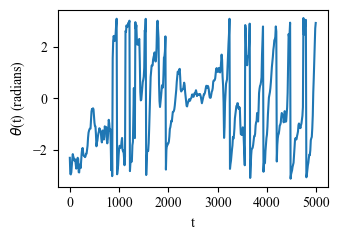

In [457]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting average angles
times = np.arange(0, 5000, 10)
ax.plot(times, city_avg_ang)
ax.set_xlabel("t")
ax.set_ylabel(r"$\theta$(t) (radians)")
ax.set_xticks(range(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("city_alignment.png", dpi = 300)
plt.show()

### Histogram

In [458]:
# loading relevant files and data
city_hist = np.load("../plotting_data/bands_city/hist.npz")
city_hist = city_hist["hist"]

L = 50
# normalise the histogram to cartesian coordinates for plotting
hist_normalised = city_hist.T / sum(city_hist)
  
# checking array size  
print(f"hist length: {len(city_hist)}")

hist length: 50


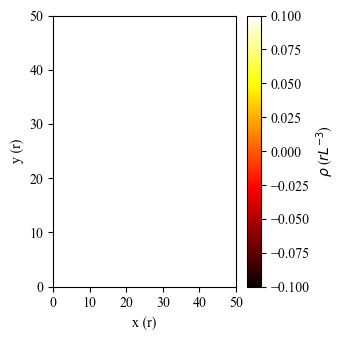

In [459]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))

# plotting densitymap
cax = ax.imshow(hist_normalised, extent = [0, L, 0, L], origin = "lower", cmap = "hot", aspect = "auto")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
fig.colorbar(cax, ax = ax, label = r"$\rho$ ($rL^{-3}$)")
plt.tight_layout()
# plt.savefig("city_density.png", dpi = 300)
plt.show()

# Vicsek_bands_repulsive

## Repulsivebig

### Start and End

In [460]:
# path to relevant files
repulsivebig_paths = glob.glob("../plotting_data/bands_repulsivebig/pos_ang*.npz")
repulsivebig_paths.sort()

# loading positions and angles
repulsivebig_start = np.load(repulsivebig_paths[1]) # first frame
repulsivebig_start_pos = repulsivebig_start["positions"]
repulsivebig_start_ang = repulsivebig_start["angles"]

repulsivebig_end = np.load(repulsivebig_paths[-1]) # last frame
repulsivebig_end_pos = repulsivebig_end["positions"]
repulsivebig_end_ang = repulsivebig_end["angles"]

# barrier size
bbarrier_x_start, bbarrier_x_end = 17.5, 32.5
bbarrier_y_start, bbarrier_y_end = 17.5, 32.5
boundary = 1

# checking array sizes  
print(f"start positions length: {len(repulsivebig_start_pos)}")
print(f"start angles length: {len(repulsivebig_start_ang)}")
print(f"end positions length: {len(repulsivebig_end_pos)}")
print(f"end angles length: {len(repulsivebig_end_ang)}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000


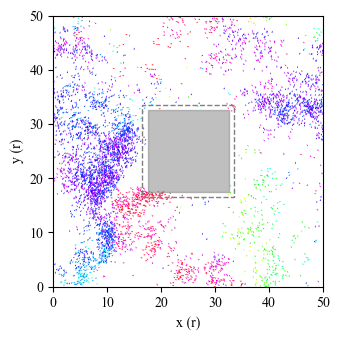

In [461]:

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

# ax1.set_aspect("equal")
# qv1 = ax1.quiver(repulsivebig_start_pos[:,0], repulsivebig_start_pos[:,1], np.cos(repulsivebig_start_ang), np.sin(repulsivebig_start_ang), repulsivebig_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
# qv1.set_offsets(repulsivebig_start_pos)
# qv1.set_UVC(np.cos(repulsivebig_start_ang), np.sin(repulsivebig_start_ang), repulsivebig_start_ang)
# ax1.add_patch(plt.Rectangle((bbarrier_x_start, bbarrier_y_start), bbarrier_x_end - bbarrier_x_start, bbarrier_y_end - bbarrier_y_start, color = "grey", alpha = 0.5))
# ax1.add_patch(plt.Rectangle((bbarrier_x_start - boundary, bbarrier_y_start - boundary), (bbarrier_x_end + boundary) - (bbarrier_x_start - boundary), (bbarrier_y_end + boundary) - (bbarrier_y_start - boundary), edgecolor = "grey", fill = False))
# ax1.set_title("Frame 3")
# ax1.set_xlabel("x (r)")
# ax1.set_ylabel("y (r)")
# ax1.set_xticks(range(0, 51, 10))
# ax1.set_yticks(range(0, 51, 10))
# ax1.set_xlim(0, 50)
# ax1.set_ylim(0, 50)

# ax2.set_aspect("equal")

# plotting last frame
fig, ax2 = plt.subplots(figsize = (3.5, 3.5))
qv2 = ax2.quiver(repulsivebig_end_pos[:,0], repulsivebig_end_pos[:,1], np.cos(repulsivebig_end_ang), np.sin(repulsivebig_end_ang), repulsivebig_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(repulsivebig_end_pos)
qv2.set_UVC(np.cos(repulsivebig_end_ang), np.sin(repulsivebig_end_ang), repulsivebig_end_ang)
ax2.add_patch(plt.Rectangle((bbarrier_x_start, bbarrier_y_start), bbarrier_x_end - bbarrier_x_start, bbarrier_y_end - bbarrier_y_start, color = "grey", alpha = 0.5))
ax2.add_patch(plt.Rectangle((bbarrier_x_start - boundary, bbarrier_y_start - boundary), (bbarrier_x_end + boundary) - (bbarrier_x_start - boundary), (bbarrier_y_end + boundary) - (bbarrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
# plt.savefig("../report_figs/repulsivebig_frames.png", dpi = 300)
plt.show()

### Order Parameter

In [462]:
# loading relevant files and data
repulsivebig_order = np.load("../plotting_data/bands_repulsivebig/order.npz")
repulsivebig_order_param = repulsivebig_order["order"]
repulsivebig_steady_reached = repulsivebig_order["steady_reached"]
repulsivebig_steady_time = repulsivebig_order["steady_time"]

time_step = 10

# checking array sizes    
print(f"order parameter length: {len(repulsivebig_order_param)}")
print(f"steady time: {repulsivebig_steady_time * 10}")

order parameter length: 500
steady time: 650.0


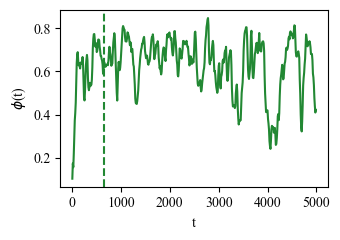

In [463]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting order parameter
times = np.arange(0, 5000, 10)
order, = ax.plot(times, repulsivebig_order_param, color = "#228833")
order_colour = order.get_color()
# plotting steady state time
if repulsivebig_steady_reached == True:
    ax.axvline(x = repulsivebig_steady_time * time_step, color = order_colour, linestyle = "--")
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("repulsivebig_order.png", dpi = 300)
plt.show()

### Clustering

In [464]:
# loading relevant files and data
repulsivebig_clusters = np.load("../plotting_data/bands_repulsivebig/clusters.npz")
repulsivebig_num_clust = repulsivebig_clusters["num_clust"]
repulsivebig_particle_clust = repulsivebig_clusters["particle_clust"]

# checking array sizes    
print(f"num clusters length: {len(repulsivebig_num_clust)}")
print(f"particles/cluster length: {len(repulsivebig_particle_clust)}")
print(f"max particles/cluster: {max(repulsivebig_particle_clust)}")

num clusters length: 501
particles/cluster length: 501
max particles/cluster: 555.5


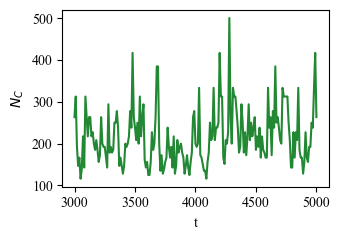

In [465]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting cluster size
time_scale = np.arange(3000, 5001, 10)
ax.plot(time_scale, repulsivebig_particle_clust[300:], color = "#228833")
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
plt.tight_layout()
# plt.savefig("repulsivebig_clusters.png", dpi = 300)
plt.show()

### Flux and Stream

In [466]:
# loading relevant files and data
repulsivebig_flow = np.load("../plotting_data/bands_repulsivebig/flow.npz")
repulsivebig_vx = repulsivebig_flow["vx"]
repulsivebig_vy = repulsivebig_flow["vy"]
repulsivebig_counts = repulsivebig_flow["counts"]
repulsivebig_vxedges = repulsivebig_flow["vxedges"]
repulsivebig_vyedges = repulsivebig_flow["vyedges"]

# checking array sizes  
print(f"vx length: {len(repulsivebig_vx)}")
print(f"vy length: {len(repulsivebig_vy)}")
print(f"counts length: {len(repulsivebig_counts)}")
print(f"vxedges length: {len(repulsivebig_vxedges)}")
print(f"vyedges length: {len(repulsivebig_vyedges)}")

vx length: 50
vy length: 50
counts length: 50
vxedges length: 51
vyedges length: 51


In [467]:
# average velocity flux calculations
rb_avg_vx = np.zeros_like(repulsivebig_vx) # empty array for average x velocity flux
rb_avg_vy = np.zeros_like(repulsivebig_vy)
rb_avg_vx[repulsivebig_counts > 0] = repulsivebig_vx[repulsivebig_counts > 0] / repulsivebig_counts[repulsivebig_counts > 0] # calculate average velocity flux
rb_avg_vy[repulsivebig_counts > 0] = repulsivebig_vy[repulsivebig_counts > 0] / repulsivebig_counts[repulsivebig_counts > 0] # where there are particles (counts > 0)

# create meshgrid for plotting
rb_X, rb_Y = np.meshgrid(repulsivebig_vxedges[:-1], repulsivebig_vyedges[:-1])

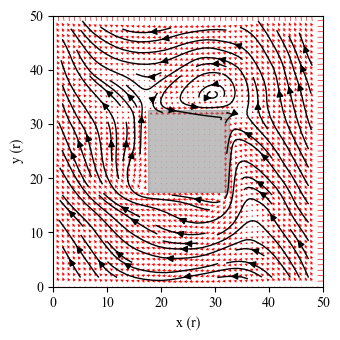

In [468]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))

# plotting velocity flux
# quiver plot
ax.quiver(rb_X, rb_Y, rb_avg_vx.T, rb_avg_vy.T, scale = 20, headwidth = 5, color = "red")
# only plot streamlines within box - not in and out of box edges (periodic boundary conditions)
edge_mask = np.ones_like(rb_avg_vx, dtype = bool)
edge_mask[1:-1, 1:-1] = False
rb_avg_vx_stream = np.where(edge_mask, np.nan, rb_avg_vx)
rb_avg_vy_stream = np.where(edge_mask, np.nan, rb_avg_vy)
# stream plot
ax.streamplot(X, Y, rb_avg_vx_stream.T, rb_avg_vy_stream.T, density = 1, linewidth = 1, color = "black")
# plot barriers
ax.add_patch(plt.Rectangle((bbarrier_x_start, bbarrier_y_start), bbarrier_x_end - bbarrier_x_start, bbarrier_y_end - bbarrier_y_start, color = "grey", alpha = 0.5))
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
# plt.savefig("../report_figs/repulsivebig_flow.png", dpi = 300)
plt.show()

### Average Angles

In [469]:
# loading relevant files and data
repulsivebig_avg_angs = np.load("../plotting_data/bands_repulsivebig/avg_ang.npz")
repulsivebig_avg_ang = repulsivebig_avg_angs["angles"]

time_step = 10

# checking array size    
print(f"average angles length: {len(repulsivebig_avg_ang)}")

average angles length: 500


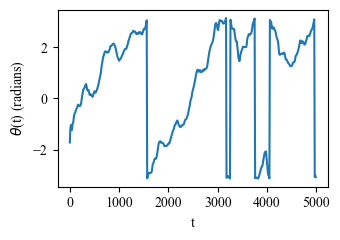

In [470]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting average angles
times = np.arange(0, 5000, 10)
ax.plot(times, repulsivebig_avg_ang)
ax.set_xlabel("t")
ax.set_ylabel(r"$\theta$(t) (radians)")
ax.set_xticks(range(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("repulsivebig_alignment.png", dpi = 300)
plt.show()

### Histogram

In [471]:
# loading relevant files and data
repulsivebig_hist = np.load("../plotting_data/bands_repulsivebig/hist.npz")
repulsivebig_hist = repulsivebig_hist["hist"]

L = 50
# normalise the histogram to cartesian coordinates for plotting
rb_hist_normalised = repulsivebig_hist.T / sum(repulsivebig_hist)

# checking array size    
print(f"hist length: {len(repulsivebig_hist)}")

hist length: 50


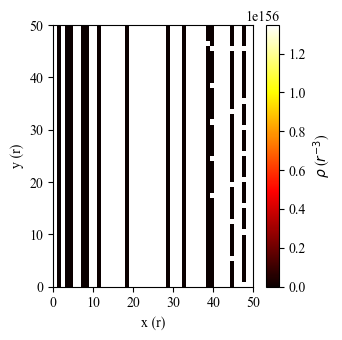

In [472]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))

# plotting densitymap
cax = ax.imshow(rb_hist_normalised, extent = [0, L, 0, L], origin = "lower", cmap = "hot", aspect = "auto")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
fig.colorbar(cax, ax = ax, label = r"$\rho$ ($r^{-3}$)")
plt.tight_layout()
# plt.savefig("repulsivebig_density.png", dpi = 300)
plt.show()

## Repulsivesmall

### Start and End

In [473]:
# path to relevant files
repulsivesmall_paths = glob.glob("../plotting_data/bands_repulsivesmall/pos_ang*.npz")
repulsivesmall_paths.sort()

# loading positions and angles
repulsivesmall_start = np.load(repulsivesmall_paths[1]) # first frame
repulsivesmall_start_pos = repulsivesmall_start["positions"]
repulsivesmall_start_ang = repulsivesmall_start["angles"]

repulsivesmall_end = np.load(repulsivesmall_paths[-1]) # last frame
repulsivesmall_end_pos = repulsivesmall_end["positions"]
repulsivesmall_end_ang = repulsivesmall_end["angles"]

# barrier size
sbarrier_x_start, sbarrier_x_end = 22.5, 27.5
sbarrier_y_start, sbarrier_y_end = 22.5, 27.5
boundary = 1

# checking array sizes    
print(f"start positions length: {len(repulsivesmall_start_pos)}")
print(f"start angles length: {len(repulsivesmall_start_ang)}")
print(f"end positions length: {len(repulsivesmall_end_pos)}")
print(f"end angles length: {len(repulsivesmall_end_ang)}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000


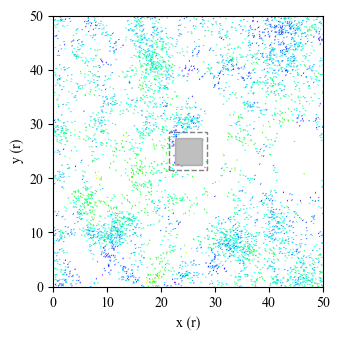

In [474]:

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

# ax1.set_aspect("equal")
# qv1 = ax1.quiver(repulsivesmall_start_pos[:,0], repulsivesmall_start_pos[:,1], np.cos(repulsivesmall_start_ang), np.sin(repulsivesmall_start_ang), repulsivesmall_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
# qv1.set_offsets(repulsivesmall_start_pos)
# qv1.set_UVC(np.cos(repulsivesmall_start_ang), np.sin(repulsivesmall_start_ang), repulsivesmall_start_ang)
# ax1.add_patch(plt.Rectangle((sbarrier_x_start, sbarrier_y_start), sbarrier_x_end - sbarrier_x_start, sbarrier_y_end - sbarrier_y_start, color = "grey", alpha = 0.5))
# ax1.add_patch(plt.Rectangle((sbarrier_x_start - boundary, sbarrier_y_start - boundary), (sbarrier_x_end + boundary) - (sbarrier_x_start - boundary), (sbarrier_y_end + boundary) - (sbarrier_y_start - boundary), edgecolor = "grey", fill = False))
# ax1.set_title("Frame 3")
# ax1.set_xlabel("x (r)")
# ax1.set_ylabel("y (r)")
# ax1.set_xticks(range(0, 51, 10))
# ax1.set_yticks(range(0, 51, 10))
# ax1.set_xlim(0, 50)
# ax1.set_ylim(0, 50)

# ax2.set_aspect("equal")

# plotting last frame
fig, ax2 = plt.subplots(figsize = (3.5, 3.5))
qv2 = ax2.quiver(repulsivesmall_end_pos[:,0], repulsivesmall_end_pos[:,1], np.cos(repulsivesmall_end_ang), np.sin(repulsivesmall_end_ang), repulsivesmall_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(repulsivesmall_end_pos)
qv2.set_UVC(np.cos(repulsivesmall_end_ang), np.sin(repulsivesmall_end_ang), repulsivesmall_end_ang)
ax2.add_patch(plt.Rectangle((sbarrier_x_start, sbarrier_y_start), sbarrier_x_end - sbarrier_x_start, sbarrier_y_end - sbarrier_y_start, color = "grey", alpha = 0.5))
ax2.add_patch(plt.Rectangle((sbarrier_x_start - boundary, sbarrier_y_start - boundary), (sbarrier_x_end + boundary) - (sbarrier_x_start - boundary), (sbarrier_y_end + boundary) - (sbarrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
# plt.savefig("../report_figs/repulsivesmall_frames.png", dpi = 300)
plt.show()

### Order Parameter

In [475]:
# loading relevant files and data
repulsivesmall_order = np.load("../plotting_data/bands_repulsivesmall/order.npz")
repulsivesmall_order_param = repulsivesmall_order["order"]
repulsivesmall_steady_reached = repulsivesmall_order["steady_reached"]
repulsivesmall_steady_time = repulsivesmall_order["steady_time"]

time_step = 10

# checking array size    
print(f"order parameter length: {len(repulsivesmall_order_param)}")
print(f"steady time: {repulsivesmall_steady_time * 10}")

order parameter length: 500
steady time: 370.0


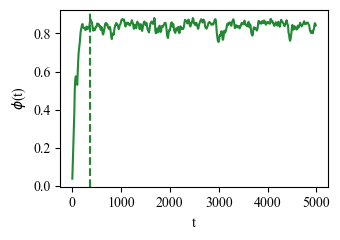

In [476]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting order parameter
times = np.arange(0, 5000, 10)
order, = ax.plot(times, repulsivesmall_order_param, color = "#228833")
order_colour = order.get_color()
# plotting steady state time
if repulsivesmall_steady_reached == True:
    ax.axvline(x = repulsivesmall_steady_time * time_step, color = order_colour, linestyle = "--")
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("repulsivesmall_order.png", dpi = 300)
plt.show()

### Clustering

In [477]:
# loading relevant files and data
repulsivesmall_clusters = np.load("../plotting_data/bands_repulsivesmall/clusters.npz")
repulsivesmall_num_clust = repulsivesmall_clusters["num_clust"]
repulsivesmall_particle_clust = repulsivesmall_clusters["particle_clust"]
 
# checking array sizes    
print(f"num clusters length: {len(repulsivesmall_num_clust)}")
print(f"particles/cluster length: {len(repulsivesmall_particle_clust)}")
print(f"max particles/cluster: {max(repulsivesmall_particle_clust)}")

num clusters length: 501
particles/cluster length: 501
max particles/cluster: 312.5


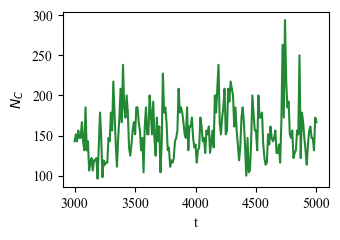

In [478]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting cluster size
time_scale = np.arange(3000, 5001, 10)
ax.plot(time_scale, repulsivesmall_particle_clust[300:], color = "#228833")
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
plt.tight_layout()
# plt.savefig("repulsivesmall_clusters.png", dpi = 300)
plt.show()

### Flux and Stream

In [479]:
# loading relevant files and data
repulsivesmall_flow = np.load("../plotting_data/bands_repulsivesmall/flow.npz")
repulsivesmall_vx = repulsivesmall_flow["vx"]
repulsivesmall_vy = repulsivesmall_flow["vy"]
repulsivesmall_counts = repulsivesmall_flow["counts"]
repulsivesmall_vxedges = repulsivesmall_flow["vxedges"]
repulsivesmall_vyedges = repulsivesmall_flow["vyedges"]

# check array sizes    
print(f"vx length: {len(repulsivesmall_vx)}")
print(f"vy length: {len(repulsivesmall_vy)}")
print(f"counts length: {len(repulsivesmall_counts)}")
print(f"vxedges length: {len(repulsivesmall_vxedges)}")
print(f"vyedges length: {len(repulsivesmall_vyedges)}")

vx length: 50
vy length: 50
counts length: 50
vxedges length: 51
vyedges length: 51


In [480]:
# average velocity flux calculations
rs_avg_vx = np.zeros_like(repulsivesmall_vx) # empty array for average x velocity flux
rs_avg_vy = np.zeros_like(repulsivesmall_vy)
rs_avg_vx[repulsivesmall_counts > 0] = repulsivesmall_vx[repulsivesmall_counts > 0] / repulsivesmall_counts[repulsivesmall_counts > 0] # calculate average velocity flux
rs_avg_vy[repulsivesmall_counts > 0] = repulsivesmall_vy[repulsivesmall_counts > 0] / repulsivesmall_counts[repulsivesmall_counts > 0] # where there are particles (counts > 0)

# create meshgrid or plotting
rs_X, rs_Y = np.meshgrid(repulsivesmall_vxedges[:-1], repulsivesmall_vyedges[:-1])

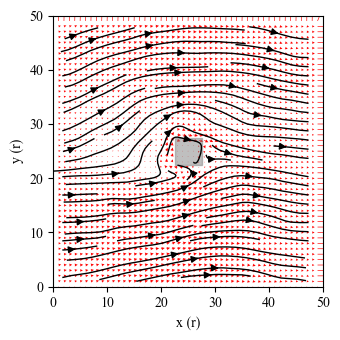

In [481]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))

# plotting velocity flux
# quiver plot
ax.quiver(rs_X, rs_Y, rs_avg_vx.T, rs_avg_vy.T, scale = 20, headwidth = 5, color = "red")
# only plot stream lines within box - not in and out of box edges (periodic boundary conditions)
edge_mask = np.ones_like(rs_avg_vx, dtype = bool)
edge_mask[1:-1, 1:-1] = False
rs_avg_vx_stream = np.where(edge_mask, np.nan, rs_avg_vx)
rs_avg_vy_stream = np.where(edge_mask, np.nan, rs_avg_vy)
# stream plot
ax.streamplot(X, Y, rs_avg_vx_stream.T, rs_avg_vy_stream.T, density = 1, linewidth = 1, color = "black")
# plot barrier
ax.add_patch(plt.Rectangle((sbarrier_x_start, sbarrier_y_start), sbarrier_x_end - sbarrier_x_start, sbarrier_y_end - sbarrier_y_start, color = "grey", alpha = 0.5))
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
# plt.savefig("../report_figs/repulsivesmall_flow.png", dpi = 300)
plt.show()

### Average Angles

In [482]:
# loading relevent files and data
repulsivesmall_avg_angs = np.load("../plotting_data/bands_repulsivesmall/avg_ang.npz")
repulsivesmall_avg_ang = repulsivesmall_avg_angs["angles"]

time_step = 10

# checking array size    
print(f"average angles length: {len(repulsivesmall_avg_ang)}")

average angles length: 500


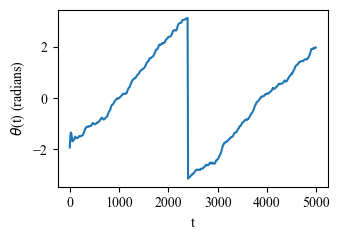

In [483]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting average angles
times = np.arange(0, 5000, 10)
ax.plot(times, repulsivesmall_avg_ang)
ax.set_xlabel("t")
ax.set_ylabel(r"$\theta$(t) (radians)")
ax.set_xticks(range(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("repulsivebig_alignment.png", dpi = 300)
plt.show()

### Histogram

In [484]:
# loading relevant files and data
repulsivesmall_hist = np.load("../plotting_data/bands_repulsivesmall/hist.npz")
repulsivesmall_hist = repulsivesmall_hist["hist"]

L = 50
# normalise the histogram to cartesian coordinates for plotting
rs_hist_normalised = repulsivesmall_hist.T / sum(repulsivesmall_hist)

# checking array size    
print(f"hist length: {len(repulsivesmall_hist)}")

hist length: 50


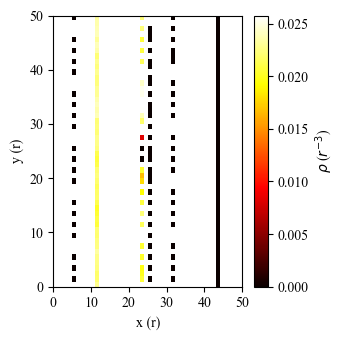

In [485]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))

# plotting densitymap
cax = ax.imshow(rs_hist_normalised, extent = [0, L, 0, L], origin = "lower", cmap = "hot", aspect = "auto")
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
fig.colorbar(cax, ax = ax, label = r"$\rho$ ($r^{-3}$)")
plt.tight_layout()
# plt.savefig("repulsivesmall_density.png", dpi = 300)
plt.show()

# Vicsek_bands_attractive

### Start and End

In [486]:
# path to relevant files
attractive_paths = glob.glob("../plotting_data/bands_attractive/pos_ang*.npz")
attractive_paths.sort()

# loading positions and angles
attractive_start = np.load(attractive_paths[1]) # first frame
attractive_start_pos = attractive_start["positions"]
attractive_start_ang = attractive_start["angles"]

attractive_end = np.load(attractive_paths[-1]) # last frame
attractive_end_pos = attractive_end["positions"]
attractive_end_ang = attractive_end["angles"]

# barrier size
bbarrier_x_start, bbarrier_x_end = 17.5, 32.5
bbarrier_y_start, bbarrier_y_end = 17.5, 32.5
 
# checking array sizes   
print(f"start positions length: {len(attractive_start_pos)}")
print(f"start angles length: {len(attractive_start_ang)}")
print(f"end positions length: {len(attractive_end_pos)}")
print(f"end angles length: {len(attractive_end_ang)}")

start positions length: 5000
start angles length: 5000
end positions length: 5000
end angles length: 5000


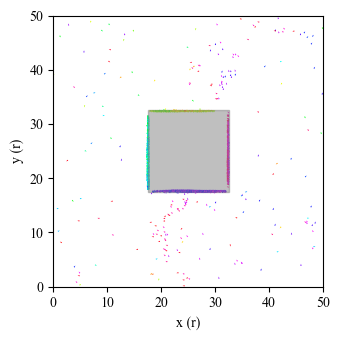

In [487]:

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (7, 3))

# ax1.set_aspect("equal")
# qv1 = ax1.quiver(attractive_start_pos[:,0], attractive_start_pos[:,1], np.cos(attractive_start_ang), np.sin(attractive_start_ang), attractive_start_ang, clim = [-np.pi, np.pi], cmap = "hsv")
# qv1.set_offsets(attractive_start_pos)
# qv1.set_UVC(np.cos(attractive_start_ang), np.sin(attractive_start_ang), attractive_start_ang)
# ax1.add_patch(plt.Rectangle((bbarrier_x_start, bbarrier_y_start), bbarrier_x_end - bbarrier_x_start, bbarrier_y_end - bbarrier_y_start, color = "grey", alpha = 0.5))
# ax1.add_patch(plt.Rectangle((bbarrier_x_start - boundary, bbarrier_y_start - boundary), (bbarrier_x_end + boundary) - (bbarrier_x_start - boundary), (bbarrier_y_end + boundary) - (bbarrier_y_start - boundary), edgecolor = "grey", fill = False))
# ax1.set_title("Frame 3")
# ax1.set_xlabel("x (r)")
# ax1.set_ylabel("y (r)")
# ax1.set_xticks(range(0, 51, 10))
# ax1.set_yticks(range(0, 51, 10))
# ax1.set_xlim(0, 50)
# ax1.set_ylim(0, 50)

# ax2.set_aspect("equal")

# plotting last frame
fig, ax2 = plt.subplots(figsize = (3.5, 3.5))
qv2 = ax2.quiver(attractive_end_pos[:,0], attractive_end_pos[:,1], np.cos(attractive_end_ang), np.sin(attractive_end_ang), attractive_end_ang, clim = [-np.pi, np.pi], cmap = "hsv")
qv2.set_offsets(attractive_end_pos)
qv2.set_UVC(np.cos(attractive_end_ang), np.sin(attractive_end_ang), attractive_end_ang)
ax2.add_patch(plt.Rectangle((bbarrier_x_start, bbarrier_y_start), bbarrier_x_end - bbarrier_x_start, bbarrier_y_end - bbarrier_y_start, color = "grey", alpha = 0.5))
ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

plt.tight_layout()
# plt.savefig("../report_figs/attractive_frames.png", dpi = 300)
plt.show()

In [488]:
# loading relevant files and data
attractive_order = np.load("../plotting_data/bands_attractive/order.npz")
attractive_order_param = attractive_order["order"]
attractive_steady_reached = attractive_order["steady_reached"]
attractive_steady_time = attractive_order["steady_time"]

time_step = 10

# checking array size    
print(f"order parameter length: {len(attractive_order_param)}")
print(f"steady time: {attractive_steady_time * 10}")

order parameter length: 500
steady time: 260.0


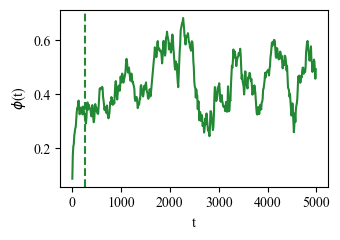

In [489]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting order parameter
times = np.arange(0, 5000, 10)
order, = ax.plot(times, attractive_order_param, color = "#228833")
order_colour = order.get_color()
if attractive_steady_reached == True:
    ax.axvline(x = attractive_steady_time * time_step, color = order_colour, linestyle = "--")
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
plt.tight_layout()
# plt.savefig("attractive_order.png", dpi = 300)
plt.show()

### Clustering

In [490]:
# loading relevant files and data
attractive_clusters = np.load("../plotting_data/bands_attractive/clusters.npz")
attractive_num_clust = attractive_clusters["num_clust"]
attractive_particle_clust = attractive_clusters["particle_clust"]

# checking array sizes    
print(f"num clusters length: {len(attractive_num_clust)}")
print(f"particles/cluster length: {len(attractive_particle_clust)}")
print(f"max particles/cluster: {max(attractive_particle_clust)}")

num clusters length: 501
particles/cluster length: 501
max particles/cluster: 5000.0


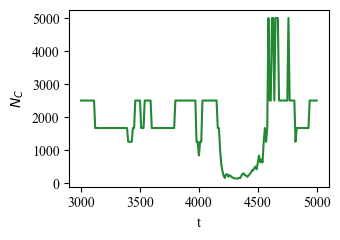

In [491]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting cluster size
time_scale = np.arange(3000, 5001, 10)
ax.plot(time_scale, attractive_particle_clust[300:], color = "#228833")
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
plt.tight_layout()
# plt.savefig("attractive_clusters.png", dpi = 300)
plt.show()

### Flux and stream

In [492]:
# loading relevant files and data
attractive_flow = np.load("../plotting_data/bands_attractive/flow.npz")
attractive_vx = attractive_flow["vx"]
attractive_vy = attractive_flow["vy"]
attractive_counts = attractive_flow["counts"]
attractive_vxedges = attractive_flow["vxedges"]
attractive_vyedges = attractive_flow["vyedges"]

# checking array sizes    
print(f"vx length: {len(attractive_vx)}")
print(f"vy length: {len(attractive_vy)}")
print(f"counts length: {len(attractive_counts)}")
print(f"vxedges length: {len(attractive_vxedges)}")
print(f"vyedges length: {len(attractive_vyedges)}")

vx length: 50
vy length: 50
counts length: 50
vxedges length: 51
vyedges length: 51


In [493]:
# average velocity flux calculations
a_avg_vx = np.zeros_like(attractive_vx) # empty array for average x velocity flux
a_avg_vy = np.zeros_like(attractive_vy)
a_avg_vx[attractive_counts > 0] = attractive_vx[attractive_counts > 0] / attractive_counts[attractive_counts > 0] # calculate average velocity flux
a_avg_vy[attractive_counts > 0] = attractive_vy[attractive_counts > 0] / attractive_counts[attractive_counts > 0] # where there are particles (counts > 0)

# create meshgrid for plotting
a_X, a_Y = np.meshgrid(attractive_vxedges[:-1], attractive_vyedges[:-1])

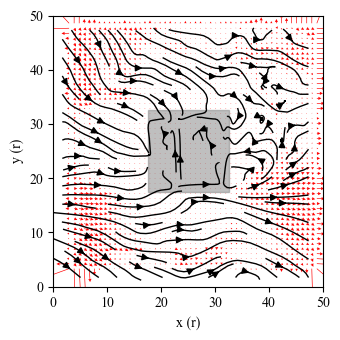

In [494]:
fig, ax = plt.subplots(figsize = (3.5, 3.5))

# plotting velocity flux
# quiver plot
ax.quiver(a_X, a_Y, a_avg_vx.T, a_avg_vy.T, scale = 20, headwidth = 5, color = "red")
# only plot stream lines within box - not in and out of box edges (periodic boundary conditions)
edge_mask = np.ones_like(a_avg_vx, dtype = bool)
edge_mask[1:-1, 1:-1] = False
a_avg_vx_stream = np.where(edge_mask, np.nan, a_avg_vx)
a_avg_vy_stream = np.where(edge_mask, np.nan, a_avg_vy)
# stream plot
ax.streamplot(X, Y, a_avg_vx_stream.T, a_avg_vy_stream.T, density = 1, linewidth = 1, color = "black")
# plot barrier
ax.add_patch(plt.Rectangle((bbarrier_x_start, bbarrier_y_start), bbarrier_x_end - bbarrier_x_start, bbarrier_y_end - bbarrier_y_start, color = "grey", alpha = 0.5))
ax.set_xlabel("x (r)")
ax.set_ylabel("y (r)")
ax.set_xticks(range(0, 51, 10))
ax.set_yticks(range(0, 51, 10))
ax.set_xlim(0, 50)
ax.set_ylim(0, 50)
plt.tight_layout()
# plt.savefig("../report_figs/attractive_flow.png", dpi = 300)
plt.show()

# Combined Plots

### Repulsive Barrier Order Parameter

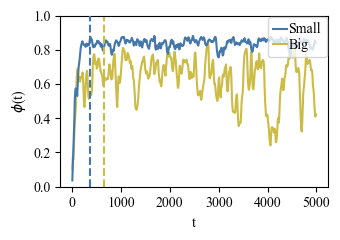

In [495]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting order parameter for small repulsive barrier and big repulsive barrier
times = np.arange(0, 5000, 10)

# small barrier
repulsivesmall_order, = ax.plot(times, repulsivesmall_order_param, label = "Small", color = "#4477AA", zorder = 2)
repulsivesmall_colour = repulsivesmall_order.get_color()
if repulsivesmall_steady_reached == True:
    ax.axvline(x = repulsivesmall_steady_time * time_step, color = repulsivesmall_colour, linestyle = "--", zorder = 4)

# big barrier
repulsivebig_order, = ax.plot(times, repulsivebig_order_param, label = "Big", color = "#CCBB44", zorder = 1)
repulsivebig_colour = repulsivebig_order.get_color()
if repulsivebig_steady_reached == True:
    ax.axvline(x = repulsivebig_steady_time * time_step, color = repulsivebig_colour, linestyle = "--", zorder = 2)

ax.legend(loc = "upper right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
ax.set_ylim(0.0, 1.0)
plt.tight_layout()
# plt.savefig("../report_figs/repulsivebs_order.png", dpi = 300)
plt.show()

### Repulsive Barrier Clustering

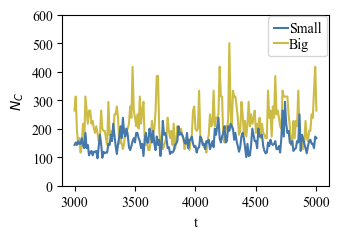

In [496]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting cluster size for small repulsive and big repulsive barriers
time_scale = np.arange(3000, 5001, 10)
ax.plot(time_scale, repulsivesmall_particle_clust[300:], label = "Small", color = "#4477AA", zorder = 2) # small
ax.plot(time_scale, repulsivebig_particle_clust[300:], label = "Big", color = "#CCBB44", zorder = 1) # big

ax.legend(loc = "upper right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
ax.set_ylim(0, 600)
plt.tight_layout()
# plt.savefig("../report_figs/repulsivebs_clusters.png", dpi = 300)
plt.show()

### 0, 1 small, 1 big, 5 Order Parameter

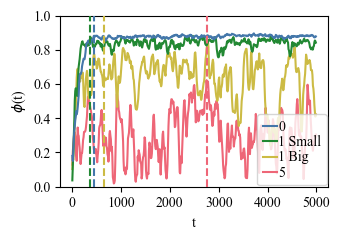

In [497]:
fig, ax = plt.subplots(figsize = (3.5, 2.5))

# plotting order paramter for 0, 1 small, 1 big, and 5 barriers
times = np.arange(0, 5000, 10)

# 0
bands_order2, = ax.plot(times, bands_order_param2, label = "0", color = "#4477AA", zorder = 4)
bands_colour2 = bands_order2.get_color()
if bands_steady_reached2 == True:
    ax.axvline(x = bands_steady_time2 * time_step, color = bands_colour2, linestyle = "--", zorder = 8)

# small
repulsivesmall_order, = ax.plot(times, repulsivesmall_order_param, label = "1 Small", color = "#228833", zorder = 3)
repulsivesmall_colour = repulsivesmall_order.get_color()
if repulsivesmall_steady_reached == True:
    ax.axvline(x = repulsivesmall_steady_time * time_step, color = repulsivesmall_colour, linestyle = "--", zorder = 7)

# big    
repulsivebig_order, = ax.plot(times, repulsivebig_order_param, label = "1 Big", color = "#CCBB44", zorder = 2)
repulsivebig_colour = repulsivebig_order.get_color()
if repulsivebig_steady_reached == True:
    ax.axvline(x = repulsivebig_steady_time * time_step, color = repulsivebig_colour, linestyle = "--", zorder = 6)

# 5    
city_order, = ax.plot(times, city_order_param, label = "5", color = "#EE6677", zorder = 1)
city_colour = city_order.get_color()
if city_steady_reached == True:
    ax.axvline(x = city_steady_time * time_step, color = city_colour, linestyle = "--", zorder = 5)

ax.legend(loc = "lower right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
ax.set_xlabel("t")
ax.set_ylabel(r"$\phi$(t)")
ax.set_xticks(np.arange(0, 5001, 1000))
ax.set_ylim(0.0, 1.0)
plt.tight_layout()
# plt.savefig("../report_figs/all_order.png", dpi = 300)
plt.show()

### 0, 1 small, 1 big, 5 Clustering

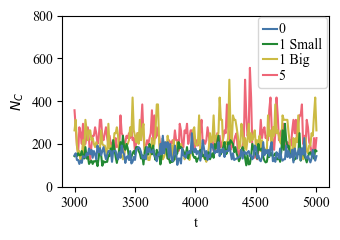

In [498]:

fig, ax = plt.subplots(figsize = (3.5, 2.5))
# plotting cluster size for 0, 1 small, 1 big, and 5 barriers
time_scale = np.arange(3000, 5001, 10)
ax.plot(time_scale, bands_particle_clust2[300:], label = "0", color = "#4477AA", zorder = 4) # 0
ax.plot(time_scale, repulsivesmall_particle_clust[300:], label = "1 Small", color = "#228833", zorder = 3) # small
ax.plot(time_scale, repulsivebig_particle_clust[300:], label = "1 Big", color = "#CCBB44", zorder = 2) # big
ax.plot(time_scale, city_particle_clust[300:], label = "5", color = "#EE6677", zorder = 1) # 5

ax.legend(loc = "upper right", labelspacing = 0.1, handlelength = 1.0, handletextpad = 0.1, borderaxespad = 0.1)
ax.set_xlabel("t")
ax.set_ylabel("$N_C$")
ax.set_xticks(np.arange(3000, 5001, 500))
ax.set_ylim(0, 800)
plt.tight_layout()
# plt.savefig("../report_figs/all_clusters.png", dpi = 300)
plt.show()

In [499]:
# clustering function from python model code

def clusters(positions, L, threshold):
    # taking into account periodic boundary conditions
    total = 0
    for d in range(positions.shape[1]):
        pd = pdist(positions[:, d].reshape(positions.shape[0],1))
        pd[pd > L * 0.5] -= L
        total += pd ** 2
    total = np.sqrt(total)
    square = squareform(total)
    
    # clustering
    clustering = DBSCAN(eps = threshold, metric = "precomputed").fit(square)
    labels = clustering.labels_ # assign cluster labels to each point (points labelled -1 are noise)
    unique_labels = set(labels) # unique clustering labels
    
    # exclude noise in number of clusters calculation
    if -1 in labels:
        num_clusters = len(unique_labels) - 1
    else:
        num_clusters = len(unique_labels)
        
    # average number of particles per cluster
    if num_clusters > 0:
        cluster_particles = len(positions) / num_clusters
    else:
        cluster_particles = 0
        
    return labels, num_clusters, cluster_particles

In [500]:
# clustering for 0, 1 small, 1 big, and 5 barriers

L = 50
cluster_threshold = 1.0
bbarrier_x_start, bbarrier_x_end = 17.5, 32.5
bbarrier_y_start, bbarrier_y_end = 17.5, 32.5

# 0 
labels, num_clusters, cluster_particles = clusters(bands_end_pos, L, cluster_threshold)
bands_labels = set(labels)
bands_colors = plt.cm.Spectral(np.linspace(0, 1, len(bands_labels)))

# small
labels, num_clusters, cluster_particles = clusters(repulsivesmall_end_pos, L, cluster_threshold)
repulsivesmall_labels = set(labels)
repulsivesmall_colors = plt.cm.Spectral(np.linspace(0, 1, len(repulsivesmall_labels)))

# big
labels, num_clusters, cluster_particles = clusters(repulsivebig_end_pos, L, cluster_threshold)
repulsivebig_labels = set(labels)
repulsivebig_colors = plt.cm.Spectral(np.linspace(0, 1, len(repulsivebig_labels)))

# 5
labels, num_clusters, cluster_particles = clusters(city_end_pos, L, cluster_threshold)
city_labels = set(labels)
city_colors = plt.cm.Spectral(np.linspace(0, 1, len(city_labels)))

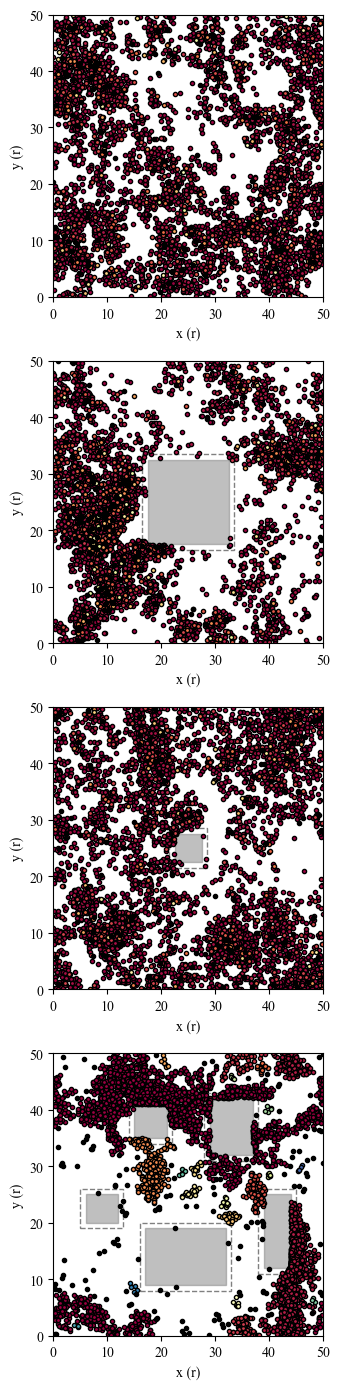

In [501]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize = (3.5, 14))

# visualising particle clustering for 0, 1 small, 1 big, and 5 barriers

# 0
for k, col in zip(bands_labels, bands_colors):
    if k == -1:
        col = "k"
        
    class_member_mask = (labels == k)
    
    xy = bands_end_pos[class_member_mask]
    ax1.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 3)

ax1.set_xlabel("x (r)")
ax1.set_ylabel("y (r)")
ax1.set_xticks(range(0, 51, 10))
ax1.set_yticks(range(0, 51, 10))
ax1.set_xlim(0, 50)
ax1.set_ylim(0, 50)

# small
ax2.add_patch(plt.Rectangle((sbarrier_x_start, sbarrier_y_start), sbarrier_x_end - sbarrier_x_start, sbarrier_y_end - sbarrier_y_start, color = "grey", alpha = 0.5))
ax2.add_patch(plt.Rectangle((sbarrier_x_start - boundary, sbarrier_y_start - boundary), (sbarrier_x_end + boundary) - (sbarrier_x_start - boundary), (sbarrier_y_end + boundary) - (sbarrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))

for k, col in zip(repulsivesmall_labels, repulsivesmall_colors):
    if k == -1:
        col = "k"
        
    class_member_mask = (labels == k)
    
    xy = repulsivesmall_end_pos[class_member_mask]
    ax2.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 3)

ax2.set_xlabel("x (r)")
ax2.set_ylabel("y (r)")
ax2.set_xticks(range(0, 51, 10))
ax2.set_yticks(range(0, 51, 10))
ax2.set_xlim(0, 50)
ax2.set_ylim(0, 50)

# big
ax3.add_patch(plt.Rectangle((bbarrier_x_start, bbarrier_y_start), bbarrier_x_end - bbarrier_x_start, bbarrier_y_end - bbarrier_y_start, color = "grey", alpha = 0.5))
ax3.add_patch(plt.Rectangle((bbarrier_x_start - boundary, bbarrier_y_start - boundary), (bbarrier_x_end + boundary) - (bbarrier_x_start - boundary), (bbarrier_y_end + boundary) - (bbarrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))

for k, col in zip(repulsivebig_labels, repulsivebig_colors):
    if k == -1:
        col = "k"
        
    class_member_mask = (labels == k)
    
    xy = repulsivebig_end_pos[class_member_mask]
    ax3.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 3)

ax3.set_xlabel("x (r)")
ax3.set_ylabel("y (r)")
ax3.set_xticks(range(0, 51, 10))
ax3.set_yticks(range(0, 51, 10))
ax3.set_xlim(0, 50)
ax3.set_ylim(0, 50)

# 5
for cbarrier_x_start, cbarrier_x_end, cbarrier_y_start, cbarrier_y_end in city_barriers:
    ax4.add_patch(plt.Rectangle((cbarrier_x_start, cbarrier_y_start), cbarrier_x_end - cbarrier_x_start, cbarrier_y_end - cbarrier_y_start, color = "grey", alpha = 0.5))
    ax4.add_patch(plt.Rectangle((cbarrier_x_start - boundary, cbarrier_y_start - boundary), (cbarrier_x_end + boundary) - (cbarrier_x_start - boundary), (cbarrier_y_end + boundary) - (cbarrier_y_start - boundary), edgecolor = "grey", fill = False, linestyle = "--"))

for k, col in zip(city_labels, city_colors):
    if k == -1:
        col = "k"
        
    class_member_mask = (labels == k)
    
    xy = city_end_pos[class_member_mask]
    ax4.plot(xy[:, 0], xy[:, 1], "o", markerfacecolor = col, markeredgecolor = "k", markersize = 3)

ax4.set_xlabel("x (r)")
ax4.set_ylabel("y (r)")
ax4.set_xticks(range(0, 51, 10))
ax4.set_yticks(range(0, 51, 10))
ax4.set_xlim(0, 50)
ax4.set_ylim(0, 50)

plt.tight_layout()
# plt.savefig("city_clustervis.png", dpi = 300)   
plt.show()